# Class 18: Introduction to statistical inference

Plan for today:
- Introduction to statistical inference
- Introduction to hypothesis tests


## Notes on the class Jupyter setup

If you have the *ydata123_2024a* environment set up correctly, you can get the class code using the code below (which presumably you've already done given that you are seeing this notebook).  

In [22]:
import YData

# YData.download.download_class_code(18)   # get class code    
# YData.download.download_class_code(18, TRUE) # get the code with the answers 


YData.download_data("movies.csv")

The file `movies.csv` already exists.
If you would like to download a new copy of the file, please rename the existing copy of the file.


There are also similar functions to download the homework:

In [23]:
# YData.download.download_class_file('project_template.ipynb', 'homework')  # downloads the class project template (hopefully you've already done this)

If you are using colabs, you should install polars and the YData packages by uncommenting and running the code below.

In [24]:
# !pip install https://github.com/emeyers/YData_package/tarball/master

If you are using google colabs, you should also uncomment and run the code below to mount the your google drive

In [25]:
# from google.colab import drive
# drive.mount('/content/drive')

In [26]:
import statistics
import pandas as pd
import numpy as np
from urllib.request import urlopen

import matplotlib.pyplot as plt
%matplotlib inline

## 1. Statistical inference

In statistical inference we use a smaller sample of data to make claims about a larger population of data. 

As an example, let's look at the [2020 election](https://www.cookpolitical.com/2020-national-popular-vote-tracker) between Donald Trump and Joe Biden, and let's focus on the results from the state of Georgia. After all the votes had been counted, the resuts showed that:

- Biden received 2,461,854 votes
- Trump received 2,473,633 votes

Since we have all the votes on election data, we can precisely calculate the population parameter of the proportion of votes that Biden received, which we will denote with the symbol $\pi_{Biden}$. 

Let's create names `num_trump_votes` and `num_biden_votes`, and calculate `true_prop_Biden` which is the value $\pi_{Biden}$. 

In [27]:
num_trump_votes = 2461854  # 2,461,854
num_biden_votes = 2473633  # 2,473,633


# calculate the proportion of people who voted for Biden
true_prop_Biden = num_biden_votes/(num_biden_votes + num_trump_votes)

true_prop_Biden

0.5011932966290864

The code below creates a DataFrame called `georgia_df` that captures these election results. Each row in the DataFrame represents a votes. The column `Voted Biden` is `True` if a voter voted for Biden and `False` if the voter voted for Trump. 

In [28]:
biden_votes = np.repeat(True, num_biden_votes)     # create 2,473,633 Trues for the Biden votes
trump_votes = np.repeat(False, num_trump_votes)    # create 2,461,854 Falses for the Trump votes
election_outcome = np.concatenate((biden_votes, trump_votes))  # put the votes together

georgia_df = pd.DataFrame({"Voted Biden": election_outcome})  # create a DataFrame with the data
georgia_df = georgia_df.sample(frac = 1)   # shuffle the order to make it more realistic

georgia_df.head()

,Voted Biden
1780053,True
3629285,False
380422,True
1621440,True
1800512,True


Now suppose we didn't know the actual value of $\pi_{Biden}$ and we wanted to estimate it based on a poll of 1,000 voters. We can simulate this by using the pandas `.sample(n = )` method.

Let's simulate sampling random voters

In [29]:
# sample 10 random points
georgia_df.sample(10)  

,Voted Biden
3666477,False
3921289,False
722116,True
3523148,False
2867041,False
483021,True
2506392,False
41104,True
139688,True
3182969,False


In [30]:
# simulate proportions of voters that voted for Biden - i.e., p-hats

one_sample = georgia_df.sample(1000)

np.mean(one_sample['Voted Biden'])

0.53

### 1b. Creating a sampling distribution via taking random samples

Suppose 100 polls were conducted. How many of them would show that Biden would get the majority of the vote? 

Let's simulate this "sampling distribution" of statistics now... 


In [31]:
%%time

sample_size = 1000
num_simulations = 100

sampling_dist = []

for i in range(num_simulations):
    
    curr_sample = georgia_df.sample(sample_size)
    prop_biden = np.mean(curr_sample["Voted Biden"])
    sampling_dist.append(prop_biden)



CPU times: user 18.4 s, sys: 51.3 ms, total: 18.4 s
Wall time: 18.6 s


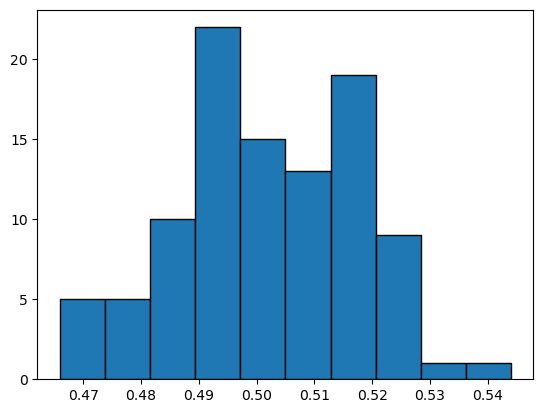

In [32]:
# plot a histogram of the sampling distribution

plt.hist(sampling_dist, edgecolor = "black");

### 1c. Creating a sampling distributions via coin flips (a faster way to simulate data)

Rather than simulating polling outcomes by pulling random samples from a DataFrame, let's simulate each vote by simulating randomly flipping a coin, where the probability of getting a "Head" (True value) is the probability of Biden getting a vote.

To do this we can generate random numbers between 0 and 1. If a number is less than the value of $\pi_{Biden}$, then it is a vote for Biden (i.e., a `True` value) otherwise it is a vote for Trump (`False` value). 


In [33]:
# simulate one coin flip of a fair coin; i.e., simulate who one person voted for 
# (50% chance of being heads, or Biden proportion chance of being heads)

heads = np.random.rand(1) <= .5

heads


array([False])

Let's generate one sample of 1,000 voters...

[0.3926858  0.99362031 0.68192271 0.66721926 0.99780777]


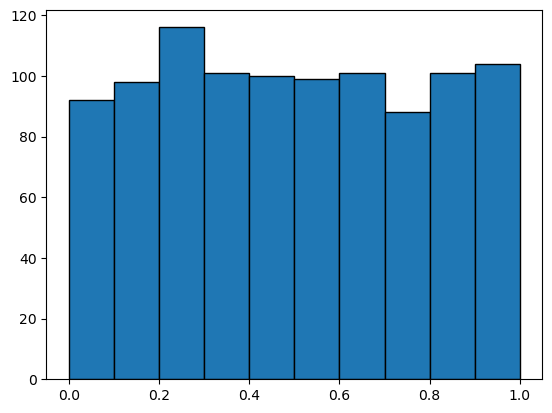

In [34]:

# usse `np.random.rand()` to generate 1,000 numbers between 0 and 1
thousand_random_nums = np.random.rand(1000)

print(thousand_random_nums[0:5])

# visualize these 1,000 numbers as a histogram
plt.hist(thousand_random_nums, edgecolor = "black");


In [35]:
# convert to a vector of Booleans (True = vote for Biden, False = vote for Trump)

voter_sample = thousand_random_nums <= true_prop_Biden

voter_sample[0:5]

array([ True, False, False, False, False])

In [36]:
# Calculate the proportion of votes for Biden in our sample

# method 1
sample_biden_prop = np.sum(voter_sample)/1000
print(sample_biden_prop)

# method 2
sample_biden_prop2 = np.mean(voter_sample)
print(sample_biden_prop2)


0.508
0.508


In [37]:
# function to generate proportion of Biden voters based on a poll

def generate_prop_biden(poll_size):
    random_sample = np.random.rand(poll_size) <= true_prop_Biden
    return np.mean(random_sample)


In [38]:
%%time

# sampling distribution of many polls conducted

sample_size = 1000
num_simulations = 100

sampling_dist = []

for i in range(num_simulations):
    prop_biden = generate_prop_biden(sample_size)
    sampling_dist.append(prop_biden)

CPU times: user 6.34 ms, sys: 4.84 ms, total: 11.2 ms
Wall time: 3.31 ms


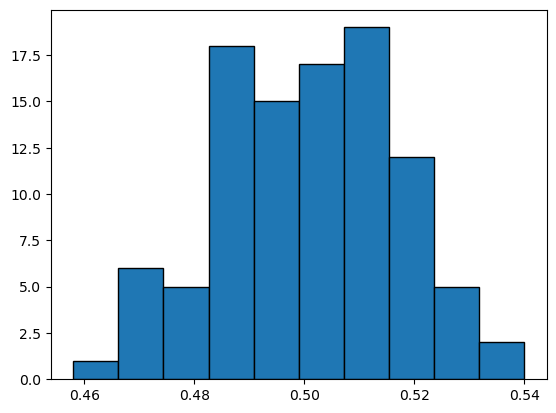

In [39]:
plt.hist(sampling_dist, edgecolor = "black", bins = 10);

## 2. Hypothesis tests

In hypothesis testing, we start with a claim about a population parameter (e.g., µ = 4.2, or π = 0.25).

This claim implies we should get a certain distribution of statistics, called "The null distribution". 

If our observed statistic is highly unlikely to come from the null distribution, we reject the claim. 

We can break down the process of running a hypothesis test into 5 steps. 

1. State the null and alternative hypothesis
2. Calculate the observed statistic of interest
3. Create the null distribution 
4. Calculate the p-value 
5. Make a decision

Let's run through these steps now!


#### Step 1: State the null and alternative hypothesis

$H_0: \pi = 0.5$

$H_A: \pi < 0.5$


#### Step 2: Calculate the observed statistic of interest


In [40]:
# load the data

movies = pd.read_csv("movies.csv")

movies.head(3)

,year,imdb,title,test,clean_test,binary,budget,domgross,intgross,code,budget_2013$,domgross_2013$,intgross_2013$,period code,decade code
0,2013,tt1711425,21 &amp; Over,notalk,notalk,FAIL,13000000,25682380.0,42195766.0,2013FAIL,13000000,25682380.0,42195766.0,1.0,1.0
1,2012,tt1343727,Dredd 3D,ok-disagree,ok,PASS,45000000,13414714.0,40868994.0,2012PASS,45658735,13611086.0,41467257.0,1.0,1.0
2,2013,tt2024544,12 Years a Slave,notalk-disagree,notalk,FAIL,20000000,53107035.0,158607035.0,2013FAIL,20000000,53107035.0,158607035.0,1.0,1.0


In [41]:
# reduce data to a smaller number of columns: "title" and "binary"

movies_smaller = movies[["title", "binary"]]

In [42]:
# calculate the proportion of movies that pass the Bechdel test

booleans_passed = movies_smaller["binary"] == "PASS"

prop_passed = np.mean(booleans_passed)

prop_passed


0.447603121516165

#### Step 3: Create the null distribution 

We need to create a null distribution, which is the distribution of statistics we would expect to get if the null hypothesis is true. 

**Question**: about what percent of the movies would we expect to pass the Bechdel test if the null distribution was true? 

**Answer**: 50%

Let's create simulated data that is consistent with this!


In [43]:
# Let's generate one proportion consistent with the null hypothesis

# get the total number of movies in our dataset n
n = movies.shape[0]
print(n)

# generate random sample indicating if each of the n movies passed the Bechdel test
null_sample = np.random.rand(n) < .5

# get the proportion of simulated movies that passed the Bechdel test
np.mean(null_sample)


1794


0.48773690078037907

In [44]:
# Let's write a function to generate a proportions consistent with a null hypothesis

def generate_prop_bechdel(n, null_prop):
    random_sample = np.random.rand(n) <= null_prop
    return np.mean(random_sample)


# call the function to generate a p-hat consistent with the null hypothesis
generate_prop_bechdel(1794, .5)

0.4855072463768116

In [45]:
# Let's generate a null distribution 

null_dist = []

for i in range(10000):    
    null_dist.append(generate_prop_bechdel(1794, .5))


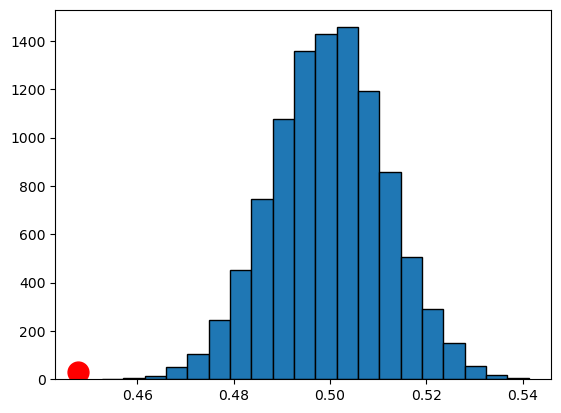

In [46]:
# visualize the null distribution 

plt.hist(null_dist, edgecolor = "black", bins = 20) #, range = (.4, .6));
plt.plot(prop_passed, 30, '.', markersize = 30, color = "red");

#### Step 4: Calculate the p-value 

Calculate the proportion of points in the null distribution that are more extreme than the observed statistic. 


In [47]:
# Calculate the p-value

# create a Boolean vector indicating whether each p-hat in the null distribution 
# was greater than the observed proportion that passed the Bechdel test
stats_more_extreme = np.array(null_dist) <= prop_passed

print(stats_more_extreme[0:5])

# calculate the p-value 
p_value = np.mean(stats_more_extreme)

p_value

[False False False False False]


0.0

#### Step 5: Make a decision

Since the p-value is very small (essentially zero) it is very unlikely that our statistic come from the null distribution. Thus we will reject the null hypothesis and conclude that less than 50% of movies pass the Bechdel test. 


## 3. Hypothesis test for multiple proportions

In a hypothesis test for multiple proportions, we are testing whether each proportion is equal to a particular value. I.e., we are testing whether $\pi_1 = p_1$, $\pi_2 = p_2$, ..., $\pi_k = p_k$, for some proportions $p_1$, $p_2$, ..., $p_k$.

A special case of this is whether all populations proportions are the same, which can be written as: $\pi_1 = \pi_2 = ... = \pi_k$.


### Movivating example: ALCU vs. Almeda County

As a motivating example, let's look look at a report by the American Civil Liberties Union (ACLU) of Almada County jury selection. In particular, the ACLU claimed that jury panels in Almeda were not representative of the underlying demographics of the population of the citizens who lived there. 

The demographics of Almeda county, and the proportion of people selected to be on jury panels, is shown in the DataFrame below, which is based on 1453 people selected to be on jury panels. Let's use this data to run a hypothesis test to examine whether the proportion of people selected to be on jury panels is consistent with the underlying demographics of Almeda. 


,Ethnicity,Population proportions,Jury proportions
0,Asian,0.15,0.26
1,Black,0.18,0.08
2,Latino,0.12,0.08
3,White,0.54,0.54
4,Other,0.01,0.04


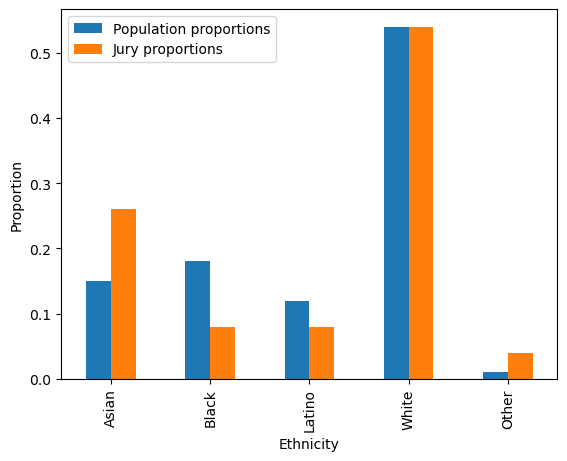

In [48]:

ethnicities = np.array(['Asian', 'Black', 'Latino', 'White', 'Other'])
population_proportions = np.array([0.15, 0.18, 0.12, 0.54, 0.01])
panel_proportions = np.array([0.26, 0.08, 0.08, 0.54, 0.04])


demographics = pd.DataFrame({"Ethnicity": ethnicities, 
                             "Population proportions": population_proportions, 
                             "Jury proportions": panel_proportions})

display(demographics)

# built in pandas plotting functions
demographics.plot.bar("Ethnicity");
plt.ylabel("Proportion");

### Step 1: State the null and alternative hypotheses

**In words** 

Null hypothesis: The proportions of members on the jury panels of different ethnicities match the underlying demographics. 

Alternative hypothesis: The proportion of at least one ethnicity does not match the underlying demographics. 


**In symbols**

$H_0$: $\pi_{Asian} = .15$,  $\pi_{Black} = .18$,  $\pi_{Latino} = .12$,  $\pi_{White} = .54$,  $\pi_{Other} = .01$

$H_A$: At least one $\pi_{i}$ is different from the values specified in the null hypothesis



### Step 2: Calculate the observed statistic

For our observed statistic we will use the Total Variational Distance (TVD) which is defined as:  $TVD ~ = ~ \sum_{i = 1}^{k} |\pi_i - \hat{p}_i |$

Let's write a function `total_variation_distance(distribution_1, distribution_2)` that can calculate the TVD. We can then use this function to calculate the TVD statistic value for the jurors in Almeda county.


In [49]:
def total_variation_distance(distribution_1, distribution_2):
    
    return np.sum(np.abs(distribution_1 - distribution_2))


# calculate the total variation distance between population proportions and the observed proportions
observed_statistic_value = total_variation_distance(panel_proportions, population_proportions)

observed_statistic_value

0.28

### Step 3: Create the null distribution 

To create the null distribution we need to simulate drawing random sample proportions from the underlying population.

To do this we can generate (uniform) random numbers between 0 and 1. We can then use the `pd.cut()` function to simulate randomly selected jurors ethnicities and convert these to proportions. 

Once we have these proportions, we can calculate the TVD. If we repreat this process 1,000 times we can get a null distribution. 

In [50]:
# calculate the cumulative proportions we can use to split the data into categories consistent with the null hypothesis

cumulative_proportions = np.append(0, np.cumsum(population_proportions))

cumulative_proportions


array([0.  , 0.15, 0.33, 0.45, 0.99, 1.  ])

In [51]:
# generate random jury panelist ethnicities

# number of jury members
num_jury_members = 1453

# generate random numbers between 0 and 1 for each jury member
rand_nums = np.random.rand(num_jury_members)

# generate random ethnicities for each jury member
one_sample = pd.cut(rand_nums, cumulative_proportions, labels = ethnicities, ordered = False)

print(one_sample[0:5])

['White', 'Asian', 'White', 'Latino', 'Latino']
Categories (5, object): ['Asian', 'Black', 'Latino', 'White', 'Other']


In [52]:
# get the proportions from our sample

# get how many simulated jury members there were for each ethnicity
unique, counts = np.unique(one_sample, return_counts=True)

# convert to proportions
sample_proportions = counts/sum(counts)

sample_proportions

array([0.14659326, 0.18995182, 0.10942877, 0.00825877, 0.54576738])

In [53]:
# Let's convert the following steps into one function

def get_sample_proportions(sample_size, true_proportions):
    
    cumulative_proportions = np.append(0, np.cumsum(true_proportions))
    
    rand_nums = np.random.rand(sample_size)
    one_sample = pd.cut(rand_nums, cumulative_proportions)
    unique, counts = np.unique(one_sample, return_counts=True)
    
    return counts/sum(counts)


# test the function
get_sample_proportions(1453, population_proportions)



array([0.16104611, 0.16379904, 0.11768754, 0.54645561, 0.0110117 ])

In [54]:
# Step 3: create null distribution 

null_dist = []

num_null_dist_points = 1000

for i in range(num_null_dist_points):
    
    curr_sample_props = get_sample_proportions(1453, population_proportions)
    curr_tvd = total_variation_distance(curr_sample_props, population_proportions)
    null_dist.append(curr_tvd)

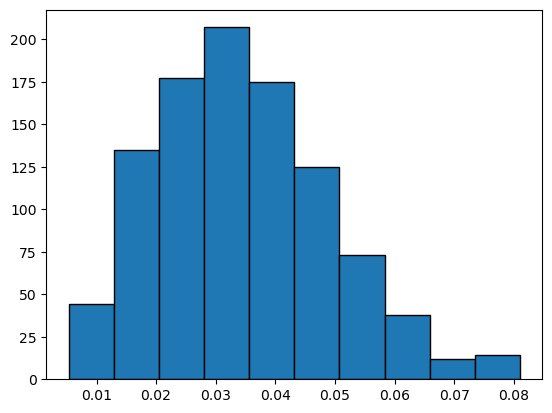

In [55]:
# plot the null distribution as a histogram

plt.hist(null_dist, edgecolor = "black");


### Step 4: Calculate the p-value

The p-value is the proportion of points in the null distribution that are more extreme than the observed statistic. 


In [56]:
p_value = np.mean(null_dist >= observed_statistic_value)

p_value

0.0

### Step 5: Draw a conclusion

Since the p-value is very small, it is very unlikely our statistic comes from the null distribution. Thus we can reject the null distribution and conclude that the proportion of members of different ethnicities on jury panels in Almeda do not reflect the underlying distribution of ethnicities in the population. 
